# **[Project] Cancer Subtype Classification**

# Introduction

The [TCGA Kidney Cancers Dataset](https://archive.ics.uci.edu/dataset/892/tcga+kidney+cancers) is a bulk RNA-seq dataset that contains transcriptome profiles (i.e., gene expression quantification data) of patients diagnosed with three different subtypes of kidney cancers.
This dataset can be used to make predictions about the specific subtype of kidney cancers given the normalized transcriptome profile data.

The normalized transcriptome profile data is given as **TPM** and **FPKM** for each gene.

> TPM (Transcripts Per Million) and FPKM (Fragments Per Kilobase Million) are two common methods for quantifying gene expression in RNA sequencing data.
> They both aim to account for the differences in sequencing depth and transcript length when estimating gene expression levels.
>
> **TPM** (Transcripts Per Million):
> - TPM is a measure of gene expression that normalizes for both library size (sequencing depth) and transcript length.
> - The main idea behind TPM is to express the abundance of a transcript relative to the total number of transcripts in a sample, scaled to one million.
>
> **FPKM** (Fragments Per Kilobase Million):
> - FPKM is another method for quantifying gene expression, which is commonly used in older RNA-seq analysis pipelines. It's similar in concept to TPM but differs in the way it's calculated.
> - FPKM also normalizes for library size and transcript length, but it measures gene expression as the number of fragments (i.e., reads) per kilobase of exon model per million reads.
>
> TPM is generally considered more robust to variations in library size, making it a preferred choice in many modern RNA-seq analysis workflows.

We provide one dataset for each kidney cancer subtype:

- [TCGA-KICH](https://portal.gdc.cancer.gov/projects/TCGA-KICH): kidney chromophobe (renal clear cell carcinoma)
- [TCGA-KIRC](https://portal.gdc.cancer.gov/projects/TCGA-KIRC): kidney renal clear cell carcinoma
- [TCGA-KIRP](https://portal.gdc.cancer.gov/projects/TCGA-KIRP): kidney renal papillary cell carcinoma

> This and _much_ more data is openly available on the [NCI Genomic Data Commons (GDC) Data Portal](https://portal.gdc.cancer.gov/).

# Data access

There are two ways to access the data: via the TNT homepage or the GDC Data Portal.

## Download from the TNT homepage (_recommended_)

The download from the TNT homepage is straightforward:

In [1]:
# ! wget http://www.tnt.uni-hannover.de/edu/vorlesungen/AMLG/data/project-cancer-classification.tar.gz
# ! tar -xzvf project-cancer-classification.tar.gz
# ! mv -v project-cancer-classification/ data/
# ! rm -v project-cancer-classification.tar.gz

In the `data/` folder you will now find many files in the [TSV format](https://en.wikipedia.org/wiki/Tab-separated_values) ([CSV](https://en.wikipedia.org/wiki/Comma-separated_values)-like with tabs as delimiter) containing the normalized transcriptome profile data.

To start, you can read a TSV file into a [pandas](https://pandas.pydata.org) [`DataFrame`](pandas dataframe to dict) using the [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) function with the `sep` parameter set to `\t`:

## Lesen der DNA-Sequenz Dateien und speichern in einer Datei

In [2]:
# import numpy as np
# import pandas as pd
# import pickle


# import os
# #'./data/tcga-kirp-geq'

# labels = ["kirp", "kirc", "kich"]   # Setzen Sie hier Ihren Ordnerpfad ein
# n_files = 0
# y = list()
# x = list()

# rick = list()
# data = []

# for l in labels:
#     root_folder = f"./data/tcga-{l}-geq"
#     for root, dirs, files in os.walk(root_folder):
#         for file in files:
#             if file.endswith('.tsv'):
#                 n_files += 1
#                 # Vollständiger Pfad zur Datei
#                 file_path = os.path.join(root, file)
#                 # Hier können Sie etwas mit der Datei machen, z.B. einlesen
#                 df = pd.read_csv(filepath_or_buffer=file_path, sep="\t", header=1)
#                 df = df['tpm_unstranded']

#                 df = df[4:]
#                 df = np.array(df)
#                 rick.append(df)
                
#                 data.append([df, l])

# print(f"Es wurden {n_files} Dateien eingelesen.")
# #tsv_file_path = "data/tcga-kich-geq/0ba21ef5-0829-422e-a674-d3817498c333/4868e8fc-e045-475a-a81d-ef43eabb7066.rna_seq.augmented_star_gene_counts.tsv"

# # Read the TSV file into a DataFrame
# #df = pd.read_csv(filepath_or_buffer=tsv_file_path, sep="\t", header=1)

# # Display the first few rows of the DataFrame
# #print(df.head(n=20))
# #rick = np.array(rick)

# # Speichern der 'kirp' Liste in einer Pickle-Datei
# #with open('rick.pickle', 'wb') as f:
# #    pickle.dump(rick, f)


In [3]:
# data_Frame = pd.DataFrame(data, columns=["genome_frequencies", "cancer_type"])
# data_Frame.head()

In [4]:
# # Speichern der Daten in einer lokalen Datei
# with open('rick.pickle', 'wb') as f:
#     pickle.dump(data_Frame, f)

In [5]:
import pickle

# Laden der 'kirp' Liste aus der Pickle-Datei
with open('rick.pickle', 'rb') as f:
    data_Frame = pickle.load(f)

In [6]:
data_Frame.head()

genome_frequencies cancer_type
0  [20.331, 0.0, 25.1806, 1.1301, 0.4836, 7.3269,...        kirp
1  [37.0405, 0.5002, 77.4246, 4.2188, 1.0408, 29....        kirp
2  [45.4456, 0.0903, 74.9545, 4.843, 1.5188, 11.8...        kirp
3  [15.2345, 0.3393, 62.0003, 2.4412, 0.932, 2.66...        kirp
4  [35.0709, 0.2333, 62.8022, 2.8872, 1.0547, 18....        kirp

# Data preprocessing

## Training set & validation set

In [7]:
import os
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(data_Frame, train_size=0.8, random_state=42)

print(f"DataSet shape: {data_Frame.shape}")
print(f"Training set{os.linesep}------------")
print(f"Dataframe shape: {train_df.shape}")
print(f"Dataframe head:{os.linesep}{train_df.head()}")
print("")
print(f"Validation set{os.linesep}--------------")
print(f"Dataframe shape: {val_df.shape}")
print(f"Dataframe head:{os.linesep}{val_df.head()}")

DataSet shape: (1034, 2)
Training set
------------
Dataframe shape: (827, 2)
Dataframe head:
                                    genome_frequencies cancer_type
518  [25.0645, 0.1125, 56.3997, 3.3108, 1.6061, 12....        kirc
355  [32.6449, 2.1789, 63.4954, 6.3228, 2.109, 40.9...        kirc
528  [46.024, 0.0, 85.8077, 7.2567, 2.1301, 9.6509,...        kirc
445  [153.0064, 1.6403, 99.3267, 7.3736, 1.3668, 10...        kirc
986  [65.5167, 18.2363, 77.2126, 5.0375, 2.4628, 21...        kich

Validation set
--------------
Dataframe shape: (207, 2)
Dataframe head:
                                    genome_frequencies cancer_type
294  [50.8994, 0.4635, 131.5049, 5.7193, 3.103, 15....        kirp
453  [35.857, 0.1018, 94.5681, 5.2997, 1.9388, 17.6...        kirc
638  [11.3865, 0.2313, 28.5961, 3.0169, 0.7851, 8.2...        kirc
139  [41.6119, 0.2207, 55.4377, 4.4395, 0.884, 3.56...        kirp
539  [63.1646, 18.8107, 63.2703, 4.6696, 0.9466, 5....        kirc


## Building a custom PyTorch dataset

## Öffnen der Datei mit den Gesammelten Sequenzen

In [8]:
from torch.utils.data import Dataset
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder

class GenomeDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

        # Umwandlung der Genome Frequenzen in Tensoren
        self.genome_frequencies = torch.tensor(dataframe['genome_frequencies'].tolist(), dtype=torch.float32)

        # Umwandlung der Krebsarten in numerische Werte
        self.label_encoder = LabelEncoder()
        self.cancer_types = torch.tensor(self.label_encoder.fit_transform(dataframe['cancer_type']), dtype=torch.long)

    def __getitem__(self, index):
        # Rückgabe eines Tupels aus Genome Frequenzen und dem entsprechenden Krebstyp
        return self.genome_frequencies[index], self.cancer_types[index]

    def __len__(self):
        return len(self.dataframe)


In [9]:
# Beispielhafte Verwendung
# Angenommen, df_train und df_valid sind Ihre Trainings- und Validierungsdaten
train_dataset = GenomeDataset(train_df)
valid_dataset = GenomeDataset(val_df)

/tmp/ipykernel_19797/2483914749.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:245.)
  self.genome_frequencies = torch.tensor(dataframe['genome_frequencies'].tolist(), dtype=torch.float32)


In [10]:
# Inspect the first item from the training dataframe
train_df_head = train_df.head(n=1)
train_df_genome_frequence =train_df_head.iloc[0]["genome_frequencies"]
train_df_cancer_type = train_df_head.iloc[0]["cancer_type"]
print(f"Genome frequency from dataframe:{os.linesep}{train_df_genome_frequence}{os.linesep}")
print(f"Cancer type  from dataframe: {train_df_cancer_type}{os.linesep}")

# Inspect the first item from the training dataset
datapoint_features, datapoint_label = train_dataset[0]
print(f"Genome frequency from dataset:{os.linesep}{datapoint_features}{os.linesep}")
print(f"Cancer type from dataset: {datapoint_label}")

Genome frequency from dataframe:
[2.50645e+01 1.12500e-01 5.63997e+01 ... 0.00000e+00 1.29000e-02
 2.47100e-01]

Cancer type  from dataframe: kirc

Genome frequency from dataset:
tensor([2.5065e+01, 1.1250e-01, 5.6400e+01,  ..., 0.0000e+00, 1.2900e-02,
        2.4710e-01])

Cancer type from dataset: 1


## Hauptkomponentenanalyse (PCA)

In [11]:
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Angenommen, X ist Ihr Datensatz
# # X = ...
# X = rick

# # Standardisieren der Daten
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Erstellen des PCA-Objekts
# pca = PCA(n_components=150)  # Angenommen, Sie möchten 150 Hauptkomponenten behalten

# # Durchführen der PCA
# X_pca = pca.fit_transform(X_scaled)

# # Die resultierenden Hauptkomponenten
# print("Transformierte Daten:", X_pca)

# # Variance Ratio für jede Komponente
# print("Varianz erklärt durch jede Komponente:", pca.explained_variance_ratio_)


# Neuronales Netz Definition

### Simples Neuronales Netz

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Definition des Modells
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

### Komplexes Neuronales Netz

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ComplexNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ComplexNN, self).__init__()
        # Definieren der Schichten
        self.fc1 = nn.Linear(input_size, 1024)  # Eingabeschicht
        self.fc2 = nn.Linear(1024, 512)        # Versteckte Schicht
        self.fc3 = nn.Linear(512, 256)         # Weitere versteckte Schicht
        self.fc4 = nn.Linear(256, num_classes) # Ausgabeschicht
        self.dropout = nn.Dropout(p=0.5)       # Dropout

    def forward(self, x):
        # Definieren des Vorwärtsdurchlaufs
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))  # Oder F.log_softmax(x, dim=1) für Mehrklassenklassifikation
        return x

In [14]:
# Annahme: input_size ist die Länge Ihrer Genome-Frequenzen und num_classes ist die Anzahl der Krebsarten
#model = SimpleNN(input_size=60660, hidden_size=5000, num_classes=3)
model = ComplexNN(input_size=60660, hidden_size=5000, num_classes=3)

# Daten-Loader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=64, shuffle=False)

In [15]:
# Verlustfunktion und Optimierer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 250

In [16]:
# Listen, um Verluste zu speichern
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Durchschnittlicher Trainingsverlust
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validierungsverlust
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

    # Durchschnittlicher Validierungsverlust
    valid_loss /= len(valid_loader)
    valid_losses.append(valid_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Trainingsverlust: {train_loss:.4f}, Validierungsverlust: {valid_loss:.4f}')

Epoch [1/250], Trainingsverlust: 1.0121, Validierungsverlust: 0.9179
Epoch [2/250], Trainingsverlust: 0.9557, Validierungsverlust: 0.9179
Epoch [3/250], Trainingsverlust: 0.9549, Validierungsverlust: 0.9179
Epoch [4/250], Trainingsverlust: 0.9544, Validierungsverlust: 0.9179
Epoch [5/250], Trainingsverlust: 0.9557, Validierungsverlust: 0.9179
Epoch [6/250], Trainingsverlust: 0.9547, Validierungsverlust: 0.9179
Epoch [7/250], Trainingsverlust: 0.9556, Validierungsverlust: 0.9179
Epoch [8/250], Trainingsverlust: 0.9559, Validierungsverlust: 0.9179
Epoch [9/250], Trainingsverlust: 0.9557, Validierungsverlust: 0.9179
Epoch [10/250], Trainingsverlust: 0.9552, Validierungsverlust: 0.9179
Epoch [11/250], Trainingsverlust: 0.9556, Validierungsverlust: 0.9179
Epoch [12/250], Trainingsverlust: 0.9559, Validierungsverlust: 0.9179
Epoch [13/250], Trainingsverlust: 0.9549, Validierungsverlust: 0.9179
Epoch [14/250], Trainingsverlust: 0.9553, Validierungsverlust: 0.9179
Epoch [15/250], Trainingsverl

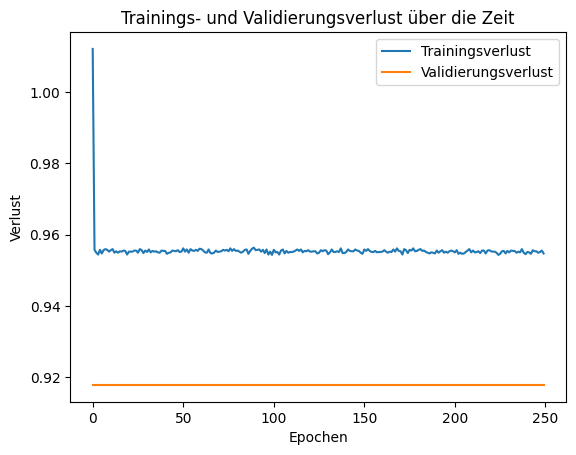

In [17]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Trainingsverlust')
plt.plot(valid_losses, label='Validierungsverlust')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.title('Trainings- und Validierungsverlust über die Zeit')
plt.legend()
plt.show()


In [18]:
# Laden der 'kirp' Liste aus der Pickle-Datei
with open('rick.pickle', 'rb') as f:
    rick = pickle.load(f)


## Hauptkomponentenanalyse (PCA)

In [19]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Angenommen, X ist Ihr Datensatz
# X = ...
X = rick

# Standardisieren der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Erstellen des PCA-Objekts
pca = PCA(n_components=150)  # Angenommen, Sie möchten 150 Hauptkomponenten behalten

# Durchführen der PCA
X_pca = pca.fit_transform(X_scaled)

# Die resultierenden Hauptkomponenten
print("Transformierte Daten:", X_pca)

# Variance Ratio für jede Komponente
print("Varianz erklärt durch jede Komponente:", pca.explained_variance_ratio_)


ValueError: setting an array element with a sequence.